<a href="https://colab.research.google.com/github/Jenifa-Dio/Python-Data-Science/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"jenifakorneli","key":"7d4a031a12b156f7c22440d77742e3c7"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d mfarhaannazirkhan/heart-dataset/

Dataset URL: https://www.kaggle.com/datasets/mfarhaannazirkhan/heart-dataset/versions/
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/27.5k [00:00<?, ?B/s]
100% 27.5k/27.5k [00:00<00:00, 6.92MB/s]


In [8]:
import zipfile
with zipfile.ZipFile('/content/heart-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data_folder')


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [16]:
# Read the file with whitespace as the delimiter
df = pd.read_csv('/content/data_folder/raw_merged_heart_dataset.csv')

# Display the first few rows to verify
print(df.head())
print(df.info())

   age  sex  cp trestbps chol fbs restecg thalachh exang  oldpeak slope ca  \
0   63    1   3      145  233   1       0      150     0      2.3     0  0   
1   37    1   2      130  250   0       1      187     0      3.5     0  0   
2   41    0   1      130  204   0       0      172     0      1.4     2  0   
3   56    1   1      120  236   0       1      178     0      0.8     2  0   
4   57    0   0      120  354   0       1      163     1      0.6     2  0   

  thal  target  
0    1       1  
1    2       1  
2    2       1  
3    2       1  
4    2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2181 non-null   object 
 4   chol      2181 non-null   object 
 5   fbs       2181 non-null   object 
 6   reste

In [17]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

1287


In [18]:
print(df.duplicated().sum())

0


In [19]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [20]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print(df[i].value_counts())
    print('\n')

age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77 28 30 31 32 33 36]
age
54    59
58    45
52    42
57    34
59    34
51    33
48    33
55    33
56    32
41    30
50    29
60    29
43    28
53    28
44    28
46    27
62    25
49    24
45    24
42    23
64    21
47    19
65    19
39    18
63    18
61    17
67    17
40    14
66    14
35    13
37    12
38    10
70     9
34     8
68     7
69     6
71     6
36     5
29     4
32     4
77     3
76     2
31     2
33     2
74     2
28     1
30     1
Name: count, dtype: int64


sex
[1 0]
sex
1    624
0    270
Name: count, dtype: int64


cp
[3 2 1 0 4]
cp
4    252
2    236
3    161
0    156
1     89
Name: count, dtype: int64


trestbps
['145' '130' '120' '140' '172' '150' '110' '135' '160' '105' '125' '142'
 '155' '104' '138' '128' '108' '134' '122' '115' '118' '100' '124' '94'
 '112' '102' '152' '101' '132' '148' '178' '129' '180' '136' '126' '106'
 '156' '170' '146' 

In [21]:
def clean_trestbps(val):
  if(val=='?'):
    return np.nan
  else:
    return int(val)

df['trestbps'] = df['trestbps'].apply(clean_trestbps)
df['trestbps'].head()

,trestbps
0,145.0
1,130.0
2,130.0
3,120.0
4,120.0


In [22]:
df['trestbps'].unique()

array([145., 130., 120., 140., 172., 150., 110., 135., 160., 105., 125.,
       142., 155., 104., 138., 128., 108., 134., 122., 115., 118., 100.,
       124.,  94., 112., 102., 152., 101., 132., 148., 178., 129., 180.,
       136., 126., 106., 156., 170., 146., 117., 200., 165., 174., 192.,
       144., 123., 154., 114., 164.,  98., 190.,  nan, 113.,  92., 158.])

In [23]:
print(df['trestbps'].isnull().sum())
df.dropna(subset=['trestbps'], inplace=True)

1


In [24]:
df['trestbps'].isnull().sum()

0

In [25]:
def clean_chol(val):
  if(val=='?'):
    return np.nan
  else:
    return int(val)

df['chol'] = df['chol'].apply(clean_chol)
df['chol'].head()

,chol
0,233.0
1,250.0
2,204.0
3,236.0
4,354.0


In [26]:
df['chol'].unique()

array([233., 250., 204., 236., 354., 192., 294., 263., 199., 168., 239.,
       275., 266., 211., 283., 219., 340., 226., 247., 234., 243., 302.,
       212., 175., 417., 197., 198., 177., 273., 213., 304., 232., 269.,
       360., 308., 245., 208., 264., 321., 325., 235., 257., 216., 256.,
       231., 141., 252., 201., 222., 260., 182., 303., 265., 309., 186.,
       203., 183., 220., 209., 258., 227., 261., 221., 205., 240., 318.,
       298., 564., 277., 214., 248., 255., 207., 223., 288., 160., 394.,
       315., 246., 244., 270., 195., 196., 254., 126., 313., 262., 215.,
       193., 271., 268., 267., 210., 295., 306., 178., 242., 180., 228.,
       149., 278., 253., 342., 157., 286., 229., 284., 224., 206., 167.,
       230., 335., 276., 353., 225., 330., 290., 172., 305., 188., 282.,
       185., 326., 274., 164., 307., 249., 341., 407., 217., 174., 281.,
       289., 322., 299., 300., 293., 184., 409., 259., 200., 327., 237.,
       218., 319., 166., 311., 169., 187., 176., 24

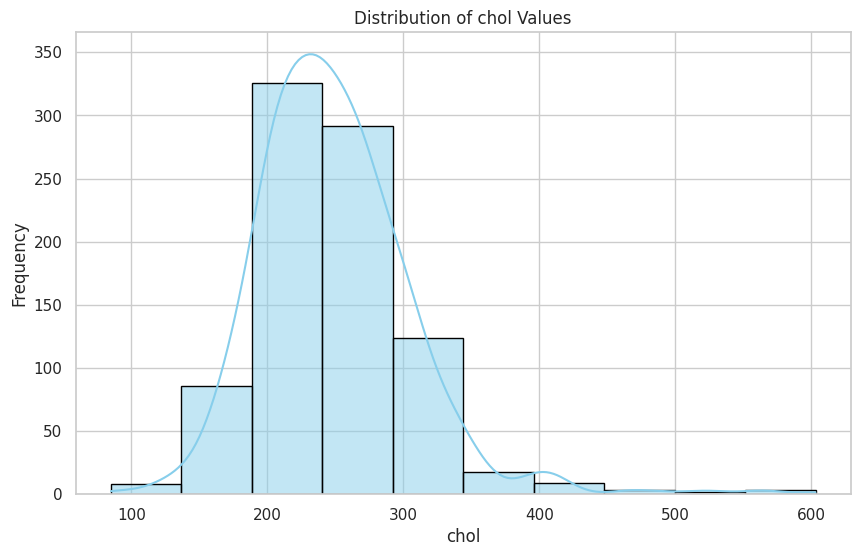

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], kde=True, bins=10, color='skyblue', edgecolor='black')

plt.title('Distribution of chol Values')
plt.xlabel('chol')
plt.ylabel('Frequency')
plt.show()

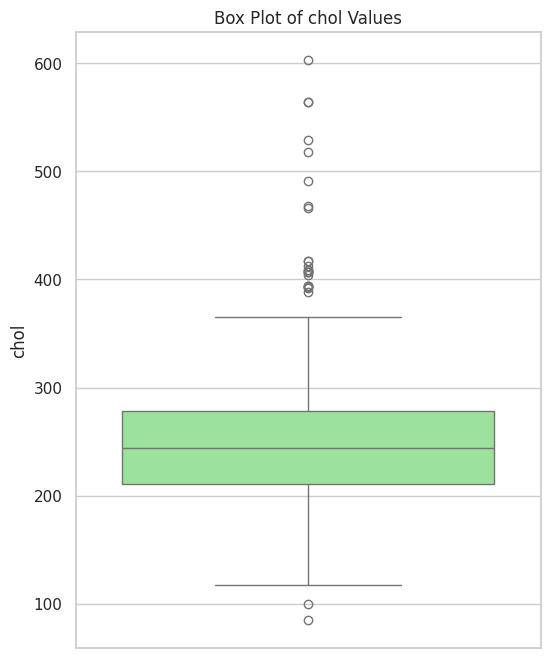

In [28]:
# Plotting the box plot
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['chol'], color='lightgreen')

plt.title('Box Plot of chol Values')
plt.ylabel('chol')
plt.show()

In [29]:
df['chol'].fillna(df['chol'].median(),inplace=True)

<ipython-input-29-a7d83bfd86ca>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['chol'].fillna(df['chol'].median(),inplace=True)


In [30]:
df['chol'].isnull().sum()

0

In [31]:
print(df['chol'].unique())

[233. 250. 204. 236. 354. 192. 294. 263. 199. 168. 239. 275. 266. 211.
 283. 219. 340. 226. 247. 234. 243. 302. 212. 175. 417. 197. 198. 177.
 273. 213. 304. 232. 269. 360. 308. 245. 208. 264. 321. 325. 235. 257.
 216. 256. 231. 141. 252. 201. 222. 260. 182. 303. 265. 309. 186. 203.
 183. 220. 209. 258. 227. 261. 221. 205. 240. 318. 298. 564. 277. 214.
 248. 255. 207. 223. 288. 160. 394. 315. 246. 244. 270. 195. 196. 254.
 126. 313. 262. 215. 193. 271. 268. 267. 210. 295. 306. 178. 242. 180.
 228. 149. 278. 253. 342. 157. 286. 229. 284. 224. 206. 167. 230. 335.
 276. 353. 225. 330. 290. 172. 305. 188. 282. 185. 326. 274. 164. 307.
 249. 341. 407. 217. 174. 281. 289. 322. 299. 300. 293. 184. 409. 259.
 200. 327. 237. 218. 319. 166. 311. 169. 187. 176. 241. 131. 132. 161.
 173. 194. 297. 292. 339. 147. 291. 358. 412. 238. 163. 280. 202. 328.
 129. 190. 179. 272. 100. 468. 320. 312. 171. 365. 344.  85. 347. 251.
 287. 156. 117. 466. 338. 529. 392. 329. 355. 603. 404. 518. 285. 279.
 388. 

In [32]:
def clean_fbs(val):
  if(val=='?'):
    return np.nan
  else:
    return int(val)

df['fbs'] = df['fbs'].apply(clean_fbs)
df['fbs'].head()

,fbs
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [33]:
print(df['fbs'].isnull().sum())
df.dropna(subset=['fbs'], inplace=True)

8


In [34]:
print(df['fbs'].isnull().sum())

0


In [38]:
def clean_restecg(val):
  if(val=='?'):
    return np.nan
  else:
    return int(val)

df['restecg'] = df['restecg'].apply(clean_restecg)
df['restecg'].head()

,restecg
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


In [39]:
print(df['restecg'].isnull().sum())
df.dropna(subset=['restecg'], inplace=True)

1
